# Kaggle - Blue Book for Bulldozers
> Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

- toc: true 
- badges: true
- comments: true
- categories: [ml]
- keywords: [ml]
- image: images/2022-04-25-bluebook-for-bulldozers/toy-bulldozer.png

![](images/2022-04-25-bluebook-for-bulldozers/heavy-machinery.jpeg)

# About
This notebook explores and builds a model for a bulldozer auction prices dataset from the [Kaggle competition](https://www.kaggle.com/c/bluebook-for-bulldozers).

## Environment Details

In [2]:
#collapse-hide
from platform import python_version
import sklearn, numpy, matplotlib, pandas

print("python==" + python_version())
print("sklearn==" + sklearn.__version__)
print("numpy==" + numpy.__version__)
print("pandas==" + pandas.__version__)
print("matplotlib==" + matplotlib.__version__)

python==3.8.8
sklearn==1.0.2
numpy==1.20.1
pandas==1.2.3
matplotlib==3.5.1


In [3]:
##
# Notebook settings
import pandas as pd

# display all dataframe columns 
pd.set_option('display.max_columns', None)

## Prepare the dataset

### Download the dataset files
* Train.zip and extract `Train.csv`. This is our training dataset.
* `Valid.csv`. This is our validation dataset.
* `Test.csv`. This is our test dataset.

This dataset can be downloaded from the Kaggle competition site, and extracted files should be placed under folder `./datasets/2022-04-35-bluebook-for-bulldozers/`. These files are made available with this notebook in the [GitHub repository](https://github.com/hassaanbinaslam/myblog/tree/master/_notebooks/datasets/2022-04-35-bluebook-for-bulldozers) and can be downloaded from there too. If you are using `Git` then it will not download them from the remote server as they exceed `50MB` limit ([read more here](https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github#file-size-limits)). For working with large files Git needs an extra extension to work with them called [git-lfs](https://git-lfs.github.com/). 

Follow the steps from Git-LFS site to install it on the system. To install it directly from the notebook (running on Linux) use these commands

In [4]:
## 
# download and install git-lfs. Uncomment them as execute.

# !curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.rpm.sh | sudo bash
# !sudo yum install git-lfs -y
# !git lfs install

Once `git-lfs` is installed use the below command to download large files from the remote server (GitHub).

In [5]:
##
# uncomment them and execute

# git lfs fetch --all
# git lfs checkout

### Take an initial look at the training data
Load the training data and look for the following information
* column names
* column data types
* how much data is missing?
* sample data elements

In [6]:
##
# load the training dataset
dataset_path = 'datasets/2022-04-35-bluebook-for-bulldozers/'

df_raw = pd.read_csv(dataset_path+'Train.csv', low_memory=False)
df = df_raw.copy()

In [7]:
##
# print training dataset summary information
df_info = pd.DataFrame()
df_info['sample'] = df.iloc[0]
df_info['data_type'] = df.dtypes
df_info['percent_missing'] = 100*df.isnull().sum() / len(df)
print(f"Total features: {len(df.columns)}")
df_info.sort_values('percent_missing')

,sample,data_type,percent_missing
SalesID,1139246,int64,0.000000
state,Alabama,object,0.000000
fiProductClassDesc,Wheel Loader - 110.0 to 120.0 Horsepower,object,0.000000
fiBaseModel,521,object,0.000000
fiModelDesc,521D,object,0.000000
ProductGroup,WL,object,0.000000
saledate,11/16/2006 0:00,object,0.000000
datasource,121,int64,0.000000
ModelID,3157,int64,0.000000
MachineID,999089,int64,0.000000


In [8]:
##
# print some unique values against each feature
def sniff(df, rows=7):
    """
    For each column return a set of unique values
    """
    data = {}
    for col in df.columns:
        data[col] = df[col].unique()[:rows]
    
    return pd.DataFrame.from_dict(data, orient='index').T


In [9]:
sniff(df)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,132,1.0,1996,4640.0,High,3/26/2004 0:00,950FII,950,F,II,LC,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,SSL,Skid Steer Loaders,Four Wheel Drive,OROPS,NaN,None or Unspecified,NaN,Extended,Powershuttle,None or Unspecified,Yes,None or Unspecified,None or Unspecified,No,Auxiliary,None or Unspecified,None or Unspecified,Yes,Sideshift & Tip,23.5,NaN,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,NaN,NaN
2,1139249,10000,434808,7009,136,2.0,2001,2838.0,Medium,2/26/2004 0:00,226,226,NaN,-6E,6,Small,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,TEX,Track Excavators,Two Wheel Drive,EROPS,Yes,Reversible,No,Standard,Standard,Yes,None or Unspecified,12',Low Profile,Variable,NaN,Yes,Yes,None or Unspecified,None or Unspecified,NaN,Manual,Yes,Yes,High Flow,Rubber,16 inch,"11' 0""",Hydraulic,Yes,Triple,Yes,None or Unspecified,Differential Steer,Limited Slip,Command Control
3,1139251,38500,1026470,332,149,11.0,2007,3486.0,NaN,5/19/2011 0:00,PC120-6E,PC120,G,LC,L,Large / Medium,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,BL,Backhoe Loaders,No,NaN,None,Street,Yes,None,Powershift,None,None,14',High Profile,None,Standard,None,Single Shank,None,Tip,"13""",Hydraulic,None,None,None or Unspecified,None,32 inch,"15' 9""",Manual,No,Single,None,Semi U,Lever,No Spin,Four Wheel Standard
4,1139253,11000,1057373,17311,172,4.0,1993,722.0,None,7/23/2009 0:00,S175,S175,E,-5,LT,Mini,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,Arizona,TTT,Track Type Tractors,All Wheel Drive,EROPS AC,None,Grouser,None,None,None or Unspecified,None,None,13',None,None,Base + 1 Function,None,Multi Shank,None,None,26.5,None,None,None,None,None,28 inch,"10' 2""",None,None,None,None,VPAT,Finger Tip,Locking,Wheel
5,1139255,26500,1001274,4605,None,7.0,2008,508.0,None,12/18/2008 0:00,310G,310,HAG,III,CR,Large,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,MG,Motor Graders,None,NO ROPS,None,None,None,None,Hydrostatic,None,None,16',None,None,Base + 3 Function,None,None,None,None,29.5,None,None,None,None,None,30 inch,"10' 6""",None,None,None,None,Straight,2 Pedal,None,No
6,1139256,21000,772701,1937,None,99.0,1000,11540.0,None,8/26/2004 0:00,790ELC,790,B,-1,SB,Compact,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",Illinois,None,None,None,None or Unspecified,None,None,None,None,Autoshift,None,None,<12',None,None,4 Valve,None,None,None,None,"14""",None,None,None,None,None,22 inch,"9' 10""",None,None,None,None,Angle,Pedal,None,None


From this first look at the data, we can see that
* data is of three types
  * numeric
  * string
  * datetime
* some columns have missing data up to 94% e.g. `Tip_Control`
* missing data is represented as
  * NaN
  * None or unspecified
* some columns' data types need to be corrected for example
  * `SaleID`, `MachineID` are represented as integers but they are categorical nominal features meaning each value is discrete and has no relation among them
  * `UsageBand` is of type string but is a categorical ordinal feature meaning their values cannot be measured but have some order between them
  * `Tire_size`, `Stick_length` are actual measurements and need to be converted to appropriate units

## Baseline Model

It is a good idea to create a baseline model early in the data science project as it can help to establish a baseline for
* time it takes to train a model
  * if the baseline model is taking too much time then we may use a smaller set of the training data for further steps
* feature importances
  * it can help us establish a relationship between features and the target
  * help us remove features that have no relationship with the target sooner
* model performance
  * we can take this model performance as a baseline, and compare it to see how much cleanup and feature engineering steps improve the model performance

For the baseline model, we would have to rely on numerical features as they don't require any preprocessing and can be readily used. Some numerical features have too much missing data so we have to be selective here.

In [10]:
##
# filter columns that are not string along with their percentage of missing data
numerical_features = df_info.loc[df_info.data_type != 'object'].sort_values('percent_missing')
numerical_features

,sample,data_type,percent_missing
SalesID,1139246,int64,0.000000
SalePrice,66000,int64,0.000000
MachineID,999089,int64,0.000000
ModelID,3157,int64,0.000000
datasource,121,int64,0.000000
YearMade,2004,int64,0.000000
auctioneerID,3.0,float64,5.019882
MachineHoursCurrentMeter,68.0,float64,64.408850


From these numerical features `MachineHoursCurrentMeter` has around 64% missing data. Let's keep this feature as well for our baseline model.

In [11]:
##
# establish target and baseline features
target = 'SalePrice' # this is the feature we are trying to predict
baseline_features = list(numerical_features.index)
baseline_features.remove(target) # remove target feature form input variables
baseline_features

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'YearMade',
 'auctioneerID',
 'MachineHoursCurrentMeter']

We have established our target and features, and can now train our baseline model. We will use only `RandomForrest` for this dataset. We have 7 features to learn from so let's start with `n_estimators=70`

In [12]:
from sklearn.ensemble import RandomForestRegressor

X, y = df[baseline_features], df[target]
X = X.fillna(0) # replace missing numerical values with 0

rf = RandomForestRegressor(n_estimators=70, oob_score=True, n_jobs=-1, verbose=1)
rf.fit(X, y)
oob_score = rf.oob_score_
oob_score

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.9min finished


0.7901663917842495

Besides the OOB score, we can also interpret our model by looking into the trained model trees' depth and leaves. If OOB score is same but our trees are smaller with fewer nodes then that model is better and more generalized. Larger trees make the model more complex and less generalized. For this let's create two more functions.

In [13]:
import numpy as np

def rf_n_leaves(rf):
    """
    return the total number of nodes in all the trees of the forrest.
    """
    return sum(est.tree_.n_leaves for est in rf.estimators_)

def rf_m_depth(rf):
    """
    return a median height of all the trees of the forrest.
    """
    return np.median([est.tree_.max_depth for est in rf.estimators_])

In [14]:
##
# print model oob_score, number of forrest leaves and median height
n_leaves = rf_n_leaves(rf)
m_depth = rf_m_depth(rf)

print(f"OOB scrore = {oob_score: .3f} \nTree leaves = {n_leaves: ,d} \nMedian depth = {m_depth}")

OOB scrore =  0.790 
Tree leaves =  16,209,726 
Median depth = 53.5


Our baseline model has an OOB score of just around 79% which is not bad as a starter. Now let's also plot the feature importance for this model.

In [15]:
def plot_feature_importance(feature_importance, feature_names, figsize=(7,7)):
    """
    plot the feature importances in a bar graph along with feature names.
    """
    fimp = pd.Series(feature_importance, feature_names)
    fimp.nlargest(len(fimp)).plot(figsize=figsize, kind='barh').invert_yaxis()

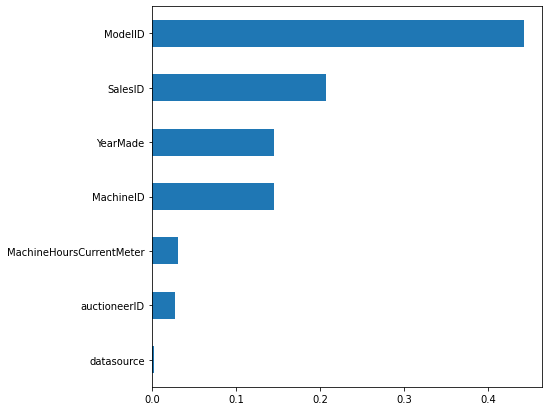

In [16]:
feature_importance = rf.feature_importances_
feature_names = X.columns
plot_feature_importance(feature_importance, feature_names)

From this feature importance plot, we can see that
* `ModelID` is the highest predictor of `SalePrice`. This could be because vehicles belonging to a certain `ModelID` category could have their `SalePrice` in the same range.
* `SalesID` and `MachineID` are coming up next as important features. This is not a good signal as both these features are unique for sale transactions and machine identification. `MachineID` also has inconsistencies as noted in this [kaggle discussion](https://www.kaggle.com/c/bluebook-for-bulldozers/discussion/3694).  A model using these features will not be generalized. It would be better if we remove these features altogether otherwise they can affect the model's performance.
* `YearMade` comes next which also makes sense as older vehicles will have less price compared to the new ones.

## Cleaning up

In this section we will remove unimportanct features and fix the data types of remaining features.

### Remove ID columns

As noted in last section we noted that following ID features can be removed from the dataset.
* SalesID
* MachineID

In [17]:
del df['SalesID']
del df['MachineID']

## Fix data types and data issues
Let's visit each feature from our dataset and check whether we need to fix the data type. Use `df_info` created in the last section to verify the data types of each feature.

### Numerical features
Let's first visit the numerical feature.

#### auctioneerID
It has the datatype as `float64` but this feature is actually categorical nominal as each ID is discrete and has no relation between them. It should be of type `str`. So let's fix that.

In [18]:
df['auctioneerID'] = df['auctioneerID'].astype(str)

### Datetime feature
Let's visit DateTime features and correct their data type
#### saledate
'saledate' is a DateTime feature. So let's correct its data type.

In [19]:
df['saledate'] = pd.to_datetime(df['saledate'])

### Categorical features

Let's now visit the categorical features.

For categorical features, there is no better way than printing the unique values for each column and spend some time analyzing the values. Analyze
* if the feature has some missing values
* if there are any missing values but are represented by some other value like 'Unspecified', 'None or Unspecified'
* keep a separate sheet with all the features and make notes for each feature like
  * there are no further actions required. The feature is good for use
  * need to replace missing values
  * any other observations 
  * etc.

#### Transform missing values

After visiting all the features we have found that missing values are represented in multiple ways like
* Unspecified
* None or Unspecified
* None
* #NAME?
* ""

So we would transform and replace all these values with `np.nan` so they all represent the same thing.

In [20]:
##
# before transformation. 
# let's use this feature to verify results.
df['Hydraulics'].unique()

array(['2 Valve', 'Auxiliary', nan, 'Standard', 'Base + 1 Function',
       'Base + 3 Function', '4 Valve', '3 Valve', 'Base + 2 Function',
       'Base + 4 Function', 'None or Unspecified', 'Base + 5 Function',
       'Base + 6 Function'], dtype=object)

In [21]:
#collapse-output
def normalize_str_values(df):
    """
    normalize dataframe str values
    * transform case to lowercase
    * replace missing values with np.nan
    """
    for col in df.columns:
        if df[col].dtype == object: 
            print(f"normalize column: {col}")
            df[col] = df[col].str.lower()
            df[col] = df[col].fillna(np.nan)
            df[col] = df[col].replace('unspecified', np.nan)
            df[col] = df[col].replace('none or unspecified', np.nan)
            df[col] = df[col].replace('none', np.nan)
            df[col] = df[col].replace('#name?', np.nan)
            df[col] = df[col].replace('', np.nan)

normalize_str_values(df)

normalize column: auctioneerID
normalize column: UsageBand
normalize column: fiModelDesc
normalize column: fiBaseModel
normalize column: fiSecondaryDesc
normalize column: fiModelSeries
normalize column: fiModelDescriptor
normalize column: ProductSize
normalize column: fiProductClassDesc
normalize column: state
normalize column: ProductGroup
normalize column: ProductGroupDesc
normalize column: Drive_System
normalize column: Enclosure
normalize column: Forks
normalize column: Pad_Type
normalize column: Ride_Control
normalize column: Stick
normalize column: Transmission
normalize column: Turbocharged
normalize column: Blade_Extension
normalize column: Blade_Width
normalize column: Enclosure_Type
normalize column: Engine_Horsepower
normalize column: Hydraulics
normalize column: Pushblock
normalize column: Ripper
normalize column: Scarifier
normalize column: Tip_Control
normalize column: Tire_Size
normalize column: Coupler
normalize column: Coupler_System
normalize column: Grouser_Tracks
no

In [22]:
##
# after transformation.
# remember that transformation is applied to all string type columns. We are using just one column to verify the results.
df['Hydraulics'].unique()

array(['2 valve', 'auxiliary', nan, 'standard', 'base + 1 function',
       'base + 3 function', '4 valve', '3 valve', 'base + 2 function',
       'base + 4 function', 'base + 5 function', 'base + 6 function'],
      dtype=object)

#### Transform measurements

Some features are represented as a string but actually they are numerical measurement values. For example
* `Tire_Size` has the size in inches with a symbol attached `"`
* `Undercarriage_Pad_Width` has the size in inches with the unit attached `inch`
* `Blade_Width` has the size in cm with a symbol attached `'`. It also has values less the 12cm represented as `<12'`
* `Stick_Length` has values in both feet and inches. We can simply convert them from `19\'8"` to 19.8
* After the above transformations, their data types should be converted to numeric

let's apply these changes to our dataset.

In [23]:
##
# before transformation
for col in ['Tire_Size', 'Undercarriage_Pad_Width', 'Blade_Width', 'Stick_Length']:
    print(f"**{col}**: ", df[col].unique())

**Tire_Size**:  [nan '23.5' '13"' '26.5' '29.5' '14"' '20.5' '17.5"' '15.5"' '20.5"'
 '17.5' '7.0"' '15.5' '23.5"' '10"' '23.1"' '10 inch']
**Undercarriage_Pad_Width**:  [nan '16 inch' '32 inch' '28 inch' '30 inch' '22 inch' '24 inch' '18 inch'
 '36 inch' '20 inch' '27 inch' '15 inch' '26 inch' '34 inch' '33 inch'
 '14 inch' '31 inch' '25 inch' '31.5 inch']
**Blade_Width**:  [nan "12'" "14'" "13'" "16'" "<12'"]
**Stick_Length**:  [nan '11\' 0"' '15\' 9"' '10\' 2"' '10\' 6"' '9\' 10"' '10\' 10"' '9\' 6"'
 '9\' 7"' '12\' 8"' '8\' 2"' '8\' 6"' '9\' 8"' '12\' 10"' '11\' 10"'
 '8\' 10"' '8\' 4"' '12\' 4"' '9\' 5"' '6\' 3"' '14\' 1"' '13\' 7"'
 '13\' 10"' '13\' 9"' '7\' 10"' '15\' 4"' '9\' 2"' '24\' 3"' '19\' 8"']


In [24]:
df['Stick_Length'] = df['Stick_Length'].replace(r"' ", ".", regex=True)
for col in ['Tire_Size', 'Undercarriage_Pad_Width', 'Blade_Width', 'Stick_Length']:
    df[col] = df[col].str.extract(r'([0-9.]*)', expand=True)
    df[col] = df[col].replace('', np.nan)
    df[col] = pd.to_numeric(df[col])

In [25]:
##
# after transformation
for col in ['Tire_Size', 'Undercarriage_Pad_Width', 'Blade_Width', 'Stick_Length']:
    print(f"**{col}**: ", df[col].unique())

**Tire_Size**:  [ nan 23.5 13.  26.5 29.5 14.  20.5 17.5 15.5  7.  10.  23.1]
**Undercarriage_Pad_Width**:  [ nan 16.  32.  28.  30.  22.  24.  18.  36.  20.  27.  15.  26.  34.
 33.  14.  31.  25.  31.5]
**Blade_Width**:  [nan 12. 14. 13. 16.]
**Stick_Length**:  [ nan 11.  15.9 10.2 10.6  9.1 10.1  9.6  9.7 12.8  8.2  8.6  9.8 12.1
 11.1  8.1  8.4 12.4  9.5  6.3 14.1 13.7 13.1 13.9  7.1 15.4  9.2 24.3
 19.8]


## Dealing with missing data

### Replace missing numeric values
For numerical features, we will follow the following approach to replace missing values
* For a column `x` create a new column `x_na` where `x_na[i]` is marked as True if `x[i]` is missing
* Replace the missing values in the x column with a median value

In [26]:
def fix_missing_num(df, colname):
    """
    replace missing values with
    * median value
    * flag the missing value in a separate *_na column
    """
    df[colname+'_na'] = pd.isnull(df[colname])
    df[colname].fillna(df[colname].median(), inplace=True)

#### YearMade

"YearMade" doesn't show any missing values but if we look closely at the data we will find that some instances have the value "1000". The year 1000 is very unlikely for any vehicle to be made in and we can consider these instances as missing values. Let's do that

<AxesSubplot:xlabel='YearMade', ylabel='SalePrice'>

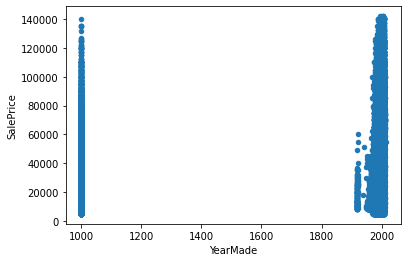

In [27]:
##
# befor transformation
df.plot.scatter('YearMade', 'SalePrice')

In [28]:
df.loc[df.YearMade==1000, 'YearMade'] = np.nan

<AxesSubplot:xlabel='YearMade', ylabel='SalePrice'>

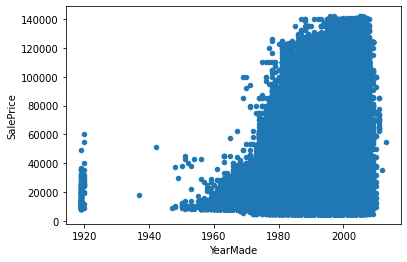

In [29]:
##
# after transformation
df.plot.scatter('YearMade', 'SalePrice')

The plot now shows a more clear relationship between 'YearMade' and 'SalePrice'. But the spike in the year 1920 is still concerning. Most probably it is also a recording error when the manufacturing year was not known then it was assigned some lowest available value in the system (similar to the year 1000). Let's take this assumption that manufacturing years before 1950 are unknown and should be assigned `np.nan`

In [31]:
df.loc[df.YearMade<1950, 'YearMade'] = np.nan

<AxesSubplot:xlabel='YearMade', ylabel='SalePrice'>

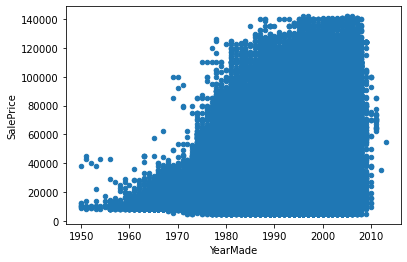

In [32]:
##
# after transformation
df.plot.scatter('YearMade', 'SalePrice')

Let's also replace the missing values with the function created above.

In [33]:
fix_missing_num(df, 'YearMade')

#### MachineHoursCurrentMeter

The next numerical feature that comes is `MachineHoursCurrentMeter`. This feature tells us the number of hours a machine has been in use when it was brought to the auction. So older machines are much more likely to have more hours on them as compared to newer machines. There should be a correlation between machine hours and the vehicle in use period (a period between manufacturing and auction). To verify this relationship we first need to find the period in years between manufacturing and auction. We have the 'YearMade' that tells us when the vehicle was made. We have the 'saledate' which is a DateTime string object but we can use it to find the 'YearSold'.

In [34]:
df['YearSold'] = df['saledate'].dt.year

In [35]:
##
# verify that we have correct data
df[['saledate', 'YearSold']].head()

,saledate,YearSold
0,2006-11-16,2006
1,2004-03-26,2004
2,2004-02-26,2004
3,2011-05-19,2011
4,2009-07-23,2009


Now we can use 'YearMade' and 'YearSold' to find the number of years the vehicle remained in use. Let's call this new column 'YearsInUse'

In [36]:
df['YearsInUse'] = df['YearSold'] - df['YearMade']

In [37]:
##
# verify the results
df[['YearsInUse', 'YearSold', 'YearMade']].head()

,YearsInUse,YearSold,YearMade
0,2.0,2006,2004.0
1,8.0,2004,1996.0
2,3.0,2004,2001.0
3,10.0,2011,2001.0
4,2.0,2009,2007.0


A sold year cannot be less than a manufacturing year. So let's verify data integrity as well.

In [38]:
df.loc[df.YearsInUse<0, ['YearsInUse', 'saledate', 'YearSold', 'YearMade']].head()

,YearsInUse,saledate,YearSold,YearMade
24007,-2.0,1994-02-11,1994,1996.0
24009,-1.0,1995-04-18,1995,1996.0
24015,-2.0,1994-09-20,1994,1996.0
24029,-1.0,1995-04-28,1995,1996.0
24064,-1.0,1995-04-28,1995,1996.0


`YearInUse` cannot have a negative value and this shows that either 'YearMade' or 'saledate' is incorrect. We can assume that error can be with 'YearMade' as this is an auction dataset and 'saledate' will be more reliable. For entries where 'YearMade' is greater than 'YearSold' we can replace 'YearMade' with 'YearSold' (better to have 'YearsInUse' equal to zero than negative).

In [39]:
df.loc[df.YearMade>df.YearSold, 'YearMade'] = df.YearSold

Let's recalculate the 'YearsInUse' with corrected data.

In [40]:
df['YearsInUse'] = df['YearSold'] - df['YearMade']

Let's verify that the data is consistent and all vehicles have 'YearMade' less than their 'YearSold'

In [41]:
df.loc[df.YearsInUse<0, ['YearsInUse', 'saledate', 'YearSold', 'YearMade']].head()

,YearsInUse,saledate,YearSold,YearMade


We can now plot the relationship between 'YearsInUse' and 'MachineHoursCurrentMeter'

<AxesSubplot:xlabel='YearsInUse', ylabel='MachineHoursCurrentMeter'>

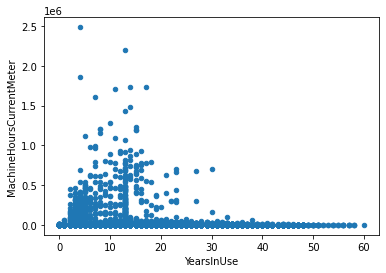

In [42]:
df.plot.scatter('YearsInUse', 'MachineHoursCurrentMeter')

This plot shows that there is some relation between a vehicle being in use and its meter hours. As the 'YearsInUse' value increases we also see an increase in meter hours, but after around 15 'YearsInUse' the relationship does not hold on and meter hours start dropping to zero. It means that `MachineHoursCurrentMeter` data has inconsistencies as many vehicles remained in use for multiple years but they also have zero meter readings. This is very unrealistic and vehicles will not be sitting idle for many years till their auction. It could be that the meter reading for them was not known and 0 could have been used for the 'Unspecified or Unknown' value. 

Let's take this assumption and transform 'MachineHoursCurrentMeter' to correctly represent that

In [46]:
df.loc[df.MachineHoursCurrentMeter==0, 'MachineHoursCurrentMeter'] = np.nan

Also apply our missing values fix on this feature

In [44]:
fix_missing_num(df, 'MachineHoursCurrentMeter')

#### Tire_Size

The next numerical feature is 'Tire_Size'. We can plot the distribution of tire sizes to find any outliers. 

<AxesSubplot:>

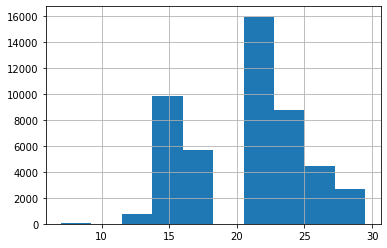

In [48]:
df['Tire_Size'].hist()

In [49]:
##
# print tire sizes
np.sort(df['Tire_Size'].unique())

array([ 7. , 10. , 13. , 14. , 15.5, 17.5, 20.5, 23.1, 23.5, 26.5, 29.5,
        nan])

The plot does not show any outliers and data seems consistant, so we can apply our missing values fix on this feature.

In [50]:
fix_missing_num(df, 'Tire_Size')

#### Stick_Length

The Next numerical feature is 'Stick_Lenght'. Let's plot the distribution to check for any outliers.

In [51]:
np.sort(df['Stick_Length'].unique())

array([ 6.3,  7.1,  8.1,  8.2,  8.4,  8.6,  9.1,  9.2,  9.5,  9.6,  9.7,
        9.8, 10.1, 10.2, 10.6, 11. , 11.1, 12.1, 12.4, 12.8, 13.1, 13.7,
       13.9, 14.1, 15.4, 15.9, 19.8, 24.3,  nan])

<AxesSubplot:ylabel='Frequency'>

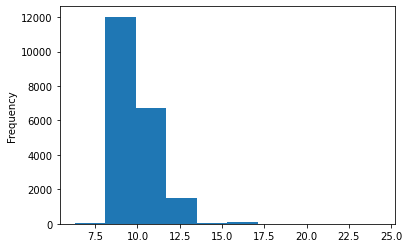

In [52]:
df['Stick_Length'].plot.hist()

The above plot shows a normal distribution and no outliers. So we can apply our missing values fix on this feature.

In [53]:
fix_missing_num(df, 'Stick_Length')

#### Undercarriage_Pad_Width

Next numerical feature is 'Undercarriage_Pad_Width'. Let's follow the same steps for this feature. 

In [54]:
np.sort(df['Undercarriage_Pad_Width'].unique())

array([14. , 15. , 16. , 18. , 20. , 22. , 24. , 25. , 26. , 27. , 28. ,
       30. , 31. , 31.5, 32. , 33. , 34. , 36. ,  nan])

<AxesSubplot:ylabel='Frequency'>

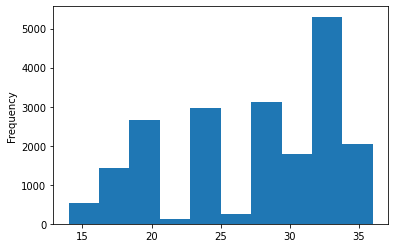

In [55]:
df['Undercarriage_Pad_Width'].plot.hist()

The distribution for this feature looks fine, and we can apply missing values fix on it.

In [56]:
fix_missing_num(df, 'Undercarriage_Pad_Width')

#### Blade_Width

Next numerical feature in 'Blade_Width'. Following the same steps as before.

In [57]:
np.sort(df['Blade_Width'].unique())

array([12., 13., 14., 16., nan])

<AxesSubplot:ylabel='Frequency'>

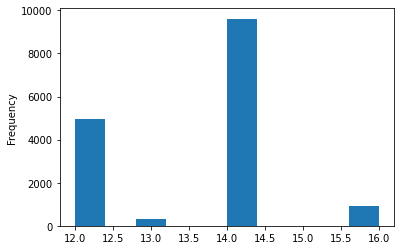

In [58]:
df['Blade_Width'].plot.hist()

Apply the fix on this feature.

In [59]:
fix_missing_num(df, 'Blade_Width')

### Replace missing categorical values



encoding and checking the importance 
We will now replace missing values for categorical features in the following way.
* We will label encode them. We will treat them as ordinal features and assign them a numeric value
* Missing values will automatically be assigned a value, and that will be 0

Some important discussion points on treating nominal categorical features as ordinal and then encoding them. A more prevalent approach is to one hot encode (OHE) them. The drawback of OHE approach is that it makes the decision trees very unbalanced if the dataset has multiple categorical features with high variance. So instead of applying OHE to all features, we will do it in a two-step approach. 
First, we will label encode them and train a model on them. After that, we will check their feature importance, and if a feature comes up as an important with a low variance then we will use OHE for it. Otherwise we will leave them with label encoding.

More can be read about categorical features encoding from these references
* [The Mechanics of Machine Learning](https://mlbook.explained.ai/catvars.html#sec:catvars) by Terence Parr and Jeremy Howard section 6.2
* [Getting Deeper into Categorical Encodings for Machine Learning](https://towardsdatascience.com/getting-deeper-into-categorical-encodings-for-machine-learning-2312acd347c8)
* [One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why?](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)

Let's create some functions to encode our categorical features.

In [60]:
from pandas.api.types import is_categorical_dtype, is_string_dtype

def df_string_to_cat(df):
    for col in df.columns:
        if is_string_dtype(df[col]):
            print(f"label encoding applied on {col}")
            df[col] = df[col].astype('category').cat.as_ordered()

def df_cat_to_catcode(df):
    for col in df.columns:
        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes + 1

Please note that Pandas represents `np.nan` with category code "-1", and so adding "1" in function `df_cat_to_catcode` shifts np.nan to 0 and all category codes to be 1 and above.

In [61]:
##
# before transformation
df.head(5).T.head(10)

,0,1,2,3,4
SalePrice,66000,57000,10000,38500,11000
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004.0,1996.0,2001.0,2001.0,2007.0
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,low,low,high,high,medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00
fiModelDesc,521d,950fii,226,pc120-6e,s175
fiBaseModel,521,950,226,pc120,s175


In [62]:
#collapse-output
# apply the cat transformation
df_string_to_cat(df)
df_cat_to_catcode(df)

label encoding applied on auctioneerID
label encoding applied on UsageBand
label encoding applied on fiModelDesc
label encoding applied on fiBaseModel
label encoding applied on fiSecondaryDesc
label encoding applied on fiModelSeries
label encoding applied on fiModelDescriptor
label encoding applied on ProductSize
label encoding applied on fiProductClassDesc
label encoding applied on state
label encoding applied on ProductGroup
label encoding applied on ProductGroupDesc
label encoding applied on Drive_System
label encoding applied on Enclosure
label encoding applied on Forks
label encoding applied on Pad_Type
label encoding applied on Ride_Control
label encoding applied on Stick
label encoding applied on Transmission
label encoding applied on Turbocharged
label encoding applied on Blade_Extension
label encoding applied on Enclosure_Type
label encoding applied on Engine_Horsepower
label encoding applied on Hydraulics
label encoding applied on Pushblock
label encoding applied on Ripper
la

In [63]:
##
# after transformation
df.head(5).T.head(10)

,0,1,2,3,4
SalePrice,66000,57000,10000,38500,11000
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,23,23,23,23,23
YearMade,2004.0,1996.0,2001.0,2001.0,2007.0
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,2,2,1,1,3
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00
fiModelDesc,950,1725,331,3674,4208
fiBaseModel,296,527,110,1375,1529


## Preprocessed dataset

At this point, all our numerical and categorical features have been preprocessed. There should be no missing values, and all categorical features should have been encoded. Only DateTime columns are remaining to be processed and we will do that in the next section. 

Let's verify the data using summary information.

In [66]:
df_info = pd.DataFrame()
df_info['sample'] = df.iloc[0]
df_info['data_type'] = df.dtypes
df_info['percent_missing'] = 100*df.isnull().sum() / len(df)
print(f"Total features: {len(df.columns)}")
df_info.sort_values('percent_missing')

Total features: 59


,sample,data_type,percent_missing
SalePrice,66000,int64,0.0
Pushblock,0,int8,0.0
Ripper,0,int8,0.0
Scarifier,0,int8,0.0
Tip_Control,0,int8,0.0
Tire_Size,20.5,float64,0.0
Coupler,0,int8,0.0
Coupler_System,0,int8,0.0
Grouser_Tracks,0,int8,0.0
Hydraulics_Flow,0,int8,0.0


Let's retrain our base model one more time but this time with all the features except datetime columns to see where we stand in our OOB score. Below is a utility function created to quickly iterate over model training.

In [128]:
def train_and_plot_model(df, target='SalePrice', drop_features=[], n_estimators=70, plot=True, verbose=1):
    """
    A utility function to train a RandomForrest model on the provided data, and plot the feature importances.
    
    Parameters
    ----------
    df: pandas.DataFrame
        input dataset to be used for training
    target: str
        target feature. this is the feature we are trying to predict
    drop_features: list
        any features to be dropped before training. Default is empty list.
    n_estimators: int
        number of estimators to be used for model training. Default is 50.
    """

    # target = 'SalePrice' # this is the feature we are trying to predict
    features = list(df.columns)

    # remove target feature and other specified features form the input variables
    features.remove(target)
    for f in drop_features:
        features.remove(f)

    X, y = df[features], df[target]

    rf = RandomForestRegressor(n_estimators, oob_score=True, n_jobs=-1, verbose=verbose)
    rf.fit(X, y)
    oob_score = rf.oob_score_

    # get trained model leaves and depth    
    n_leaves = rf_n_leaves(rf)
    m_depth = rf_m_depth(rf)

    # print trained model info
    print(f"OOB scrore = {oob_score: .3f} \nTree leaves = {n_leaves: ,d} \nMedian depth = {m_depth}")

    # plot trained model feature importance
    feature_importance = rf.feature_importances_
    if plot:
        plot_feature_importance(feature_importance, features, (10,15))
    
    # return trained model, feature names, and their importances
    return (rf, features, feature_importance, oob_score)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  4.2min finished


OOB scrore =  0.904 
Tree leaves =  14,660,873 
Median depth = 45.0


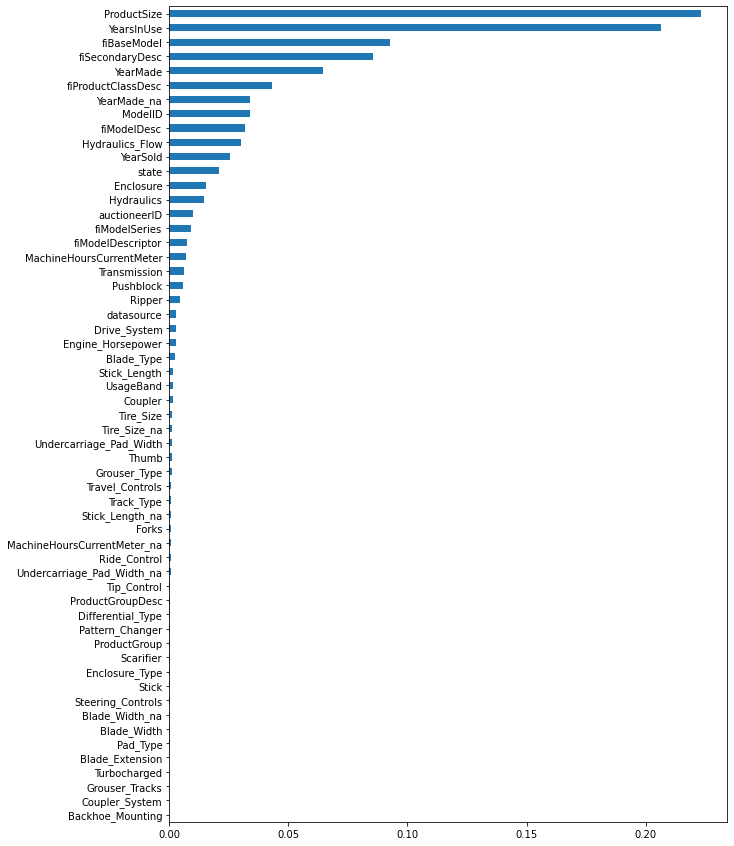

In [68]:
##
# keeping n_estimators same as previous base model i.e. 70
(rf, feature_names, feature_importance, oob_pre) = train_and_plot_model(df, drop_features=['saledate'], n_estimators=70)

This is a big improvement in our model performance. Our base model had 0.790 OOB score and now we are at 0.904. Our features count has also increased from 7 to 59, so we can take one more shot at it by increasing the estomators count (`n_estimators`). Let's use `150` trees this time (double that last time) to see how much effect it can have on model performance.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.2min finished


OOB scrore =  0.906 
Tree leaves =  31,408,663 
Median depth = 46.0


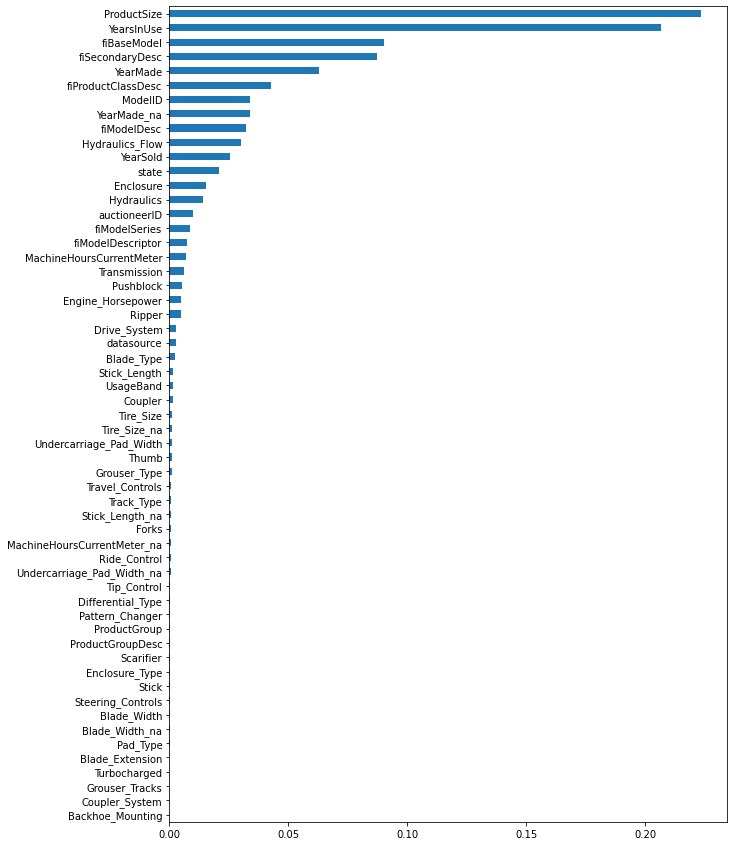

In [69]:
(rf, feature_names, feature_importance, oob_pre) = train_and_plot_model(df, drop_features=['saledate'], n_estimators=150, plot=False)

Though there is only a slight increase in model performance but it took us significantly more time to train the model. So we will keep our estimators low and revisit them during the tuning phase. With "70" estimators our model performance is
```
OOB scrore =  0.904
Tree leaves =  14,660,873 
Median depth = 45.0
```
At this point, our features have correct data types and their missing values are properly adjusted. We can now focus on some feature engineering aspects. Before moving further let's also save our dataset till this point so if we make an error we can restart from this checkpoint.

In [70]:
##
# store preprocessed data as a check point for this state
df.to_pickle(dataset_path+'preprocessed.pkl')

We have used `pickle` format to preserve data types for saved data.

In [71]:
##
# load preprocessed data (optional step)
# df = pd.read_pickle(dataset_path+'preprocessed.pkl')
# (rf, feature_names, feature_importance, oob_pre) = train_and_plot_model(df, drop_features=['saledate'], n_estimators=70)

## Feature Engineering

For feature engineering, we will give priority to important features. For this let us again analyze the preprocessed dataset starting from important features to see what can be done against each feature.

In [72]:
##
# sort the dataframe with important features at the start
temp = pd.Series(feature_importance, feature_names)
cols = temp.nlargest(len(temp)).index

sniff(df[cols], 10)

,ProductSize,YearsInUse,fiBaseModel,fiSecondaryDesc,YearMade,fiProductClassDesc,ModelID,YearMade_na,fiModelDesc,Hydraulics_Flow,YearSold,state,Enclosure,Hydraulics,auctioneerID,fiModelSeries,fiModelDescriptor,MachineHoursCurrentMeter,Transmission,Pushblock,Engine_Horsepower,Ripper,Drive_System,datasource,Blade_Type,Stick_Length,UsageBand,Coupler,Tire_Size,Tire_Size_na,Undercarriage_Pad_Width,Thumb,Grouser_Type,Travel_Controls,Track_Type,Stick_Length_na,Forks,MachineHoursCurrentMeter_na,Ride_Control,Undercarriage_Pad_Width_na,Tip_Control,Differential_Type,Pattern_Changer,ProductGroup,ProductGroupDesc,Scarifier,Enclosure_Type,Stick,Steering_Controls,Blade_Width,Blade_Width_na,Pad_Type,Blade_Extension,Turbocharged,Grouser_Tracks,Coupler_System,Backhoe_Mounting
0,0,2.0,296,40,2004.0,59,3157,False,950,0,2006,1,3,1,23,0,0,68.0,0,0,0,0,0,121,0,9.7,2,0,20.5,True,28.0,0,0,0,0,True,0,False,0,True,0,4,0,6,6,0,0,0,2,14.0,True,0,0,0,0,0,0
1,4,8.0,527,54,1996.0,62,77,True,1725,2,2004,33,5,4,2,97,65,4640.0,5,1,1,3,2,132,5,11.0,1,2,23.5,False,16.0,1,1,3,2,False,1,True,1,False,1,0,2,3,3,1,2,1,0,12.0,False,2,1,1,1,1,1
2,6.0,3.0,110.0,0.0,2001.0,39.0,7009.0,NaN,331.0,1.0,2011.0,32.0,1.0,0.0,13.0,44.0,20.0,2838.0,6.0,NaN,2.0,2.0,4.0,136.0,6.0,15.9,3.0,1.0,13.0,NaN,32.0,2.0,3.0,5.0,1.0,NaN,NaN,NaN,2.0,NaN,2.0,1.0,1.0,4.0,4.0,NaN,1.0,2.0,1.0,13.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,3.0,10.0,1375.0,56.0,2007.0,8.0,332.0,NaN,3674.0,NaN,2009.0,44.0,0.0,11.0,4.0,102.0,64.0,3486.0,4.0,NaN,NaN,1.0,3.0,149.0,9.0,10.2,0.0,NaN,26.5,NaN,30.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,NaN,3.0,16.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,5.0,4.0,1529.0,47.0,1993.0,40.0,17311.0,NaN,4208.0,NaN,2008.0,3.0,2.0,5.0,24.0,33.0,83.0,722.0,3.0,NaN,NaN,NaN,1.0,172.0,7.0,10.6,NaN,NaN,29.5,NaN,22.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,5.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,11.0,175.0,61.0,2008.0,2.0,4605.0,NaN,493.0,NaN,2005.0,9.0,4.0,7.0,27.0,98.0,33.0,508.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,9.1,NaN,NaN,14.0,NaN,24.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,1.0,419.0,20.0,1998.0,14.0,1937.0,NaN,1453.0,NaN,2007.0,13.0,NaN,3.0,30.0,2.0,100.0,11540.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,10.1,NaN,NaN,17.5,NaN,18.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,7.0,243.0,105.0,1999.0,17.0,3539.0,NaN,740.0,NaN,2010.0,37.0,NaN,2.0,26.0,73.0,128.0,4883.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,9.6,NaN,NaN,15.5,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,5.0,250.0,133.0,2003.0,68.0,36003.0,NaN,779.0,NaN,2000.0,35.0,NaN,6.0,25.0,13.0,71.0,302.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.8,NaN,NaN,7.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,14.0,540.0,129.0,1991.0,51.0,3883.0,NaN,1771.0,NaN,2002.0,4.0,NaN,8.0,11.0,54.0,122.0,20700.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.2,NaN,NaN,10.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above table is sorted based on the importance of each feature. Features at the start have more importance. So let's visit each feature to see if any feature engineering (`FE`) can be used to gain more insights from the data.

* ProductSize, YearsInUse: These features have numbers. Not a candidate for FE.
* fiBaseModel: It is label encoded. Let's visit this column's original values to see if any more features can be generated from it.

In [83]:
df_raw['fiBaseModel'].unique()[:50]

array(['521D', '950FII', '226', 'PC120-6E', 'S175', '310G', '790ELC',
       '416D', '430HAG', '988B', 'D31E', 'PC200LC6', '420D', '214E',
       '310E', '334', '45NX', '302.5', '580SUPER K', 'JS260', '120G',
       '966FII', 'EX550STD', '685B', '345BL', '330BL', '873', 'WA250',
       '750BLT', '303CR', '95ZII', '416', '303.5', 'CTL60', '140G',
       '307CSB', 'EC210LC', 'MF650', 'RC30', 'EX120-5', '70XT', '772A',
       '160HNA', '216', '304CR', 'D3CIIIXL', '236', '120C', 'PC228',
       'SK160LC'], dtype=object)

* fiBaseModel: original values look very random and do not give much information. There are two other columns in the importance list 'fiModelDesc', and 'fiSecondaryDesc' and from their name they look related to 'fiBaseModel'. So let's analyze them together.

In [85]:
df_raw[['fiBaseModel', 'fiModelDesc', 'fiSecondaryDesc']].head(10)

,fiBaseModel,fiModelDesc,fiSecondaryDesc
0,521,521D,D
1,950,950FII,F
2,226,226,NaN
3,PC120,PC120-6E,NaN
4,S175,S175,NaN
5,310,310G,G
6,790,790ELC,E
7,416,416D,D
8,430,430HAG,HAG
9,988,988B,B


* fiBaseModel, fiModelDesc, fiSecondaryDesc: From the above table all these three features are very much related but their values are very random and do not give us much information. So let's leave them as it is.
* YearMade: It has numbers. Not a candidate for FE.
* fiProductClassDesc. This feature is also encode so let's visit it's original values.

In [88]:
df_raw['fiProductClassDesc'].unique()[:15]

array(['Wheel Loader - 110.0 to 120.0 Horsepower',
       'Wheel Loader - 150.0 to 175.0 Horsepower',
       'Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity',
       'Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons',
       'Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity',
       'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
       'Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons',
       'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
       'Wheel Loader - 350.0 to 500.0 Horsepower',
       'Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower',
       'Hydraulic Excavator, Track - 19.0 to 21.0 Metric Tons',
       'Hydraulic Excavator, Track - 4.0 to 5.0 Metric Tons',
       'Hydraulic Excavator, Track - 2.0 to 3.0 Metric Tons',
       'Hydraulic Excavator, Track - 24.0 to 28.0 Metric Tons',
       'Motorgrader - 45.0 to 130.0 Horsepower'], dtype=object)

* **fiProductClassDesc**: This feature has text strings and it is also showing that they are not randow but has some pattern in then. They seems to be a good candidate for FE. We will do that in next section.
* ModelID, YearSold: These features have numbers. Not a candidate for FE. 
* Hydraulics_Flow: It is encoded so let's visit original values first.

In [95]:
df_raw['Hydraulics_Flow'].unique()

array([nan, 'Standard', 'High Flow', 'None or Unspecified'], dtype=object)

* **Hydraulics_Flow**: We label encoded it and it came up as an important feature. Its values are showing low variance so it is a better candidate for one-hot encoding. We will do that in the next section.
* state: It is encoded so let's visit its original values.

In [102]:
print(f"total unique values: {len(df_raw['state'].unique())}")
df_raw['state'].unique()[:15]

total unique values: 53


array(['Alabama', 'North Carolina', 'New York', 'Texas', 'Arizona',
       'Florida', 'Illinois', 'Oregon', 'Ohio', 'Arkansas', 'Wisconsin',
       'Kansas', 'Nevada', 'Iowa', 'Maine'], dtype=object)

* state: By looking at original values we can see that it is a categorical nominal feature. It can be one hot encoded but since it has high variance (53 unique values) it is better to keep it as label encoded. So leave this feature as it is.
* Enclosure: It is encoded. So let's check original values

In [103]:
print(f"total unique values: {len(df_raw['Enclosure'].unique())}")
df_raw['Enclosure'].unique()

total unique values: 7


array(['EROPS w AC', 'OROPS', 'EROPS', nan, 'EROPS AC', 'NO ROPS',
       'None or Unspecified'], dtype=object)

* **Enclosure**: Original values show that it is a categorical feature with good importance and low variance, so it is also suitable for OHE.
* Hydraulics: It is also encoded. So let's check original values

In [104]:
print(f"total unique values: {len(df_raw['Hydraulics'].unique())}")
df_raw['Hydraulics'].unique()

total unique values: 13


array(['2 Valve', 'Auxiliary', nan, 'Standard', 'Base + 1 Function',
       'Base + 3 Function', '4 Valve', '3 Valve', 'Base + 2 Function',
       'Base + 4 Function', 'None or Unspecified', 'Base + 5 Function',
       'Base + 6 Function'], dtype=object)

* Hydraulics: Now this feature is again categorical, does not have high variance but also has low importance. We can consider it for OHE but since it is coming at the lower end feature importance, it will not have much impact on model performace. So we can skip it for OHE.
* For the remaining features, importance is not significant enough to be considered for any FE. We can keep them as it is.
* **saledate**: We did not use this feature in our last model training. But from the feature importance we can see that features that contain any date information are showing significant importance. So we should also include this feature in our next model.

To summarize this section, the features that are suitable for any FE are
* fiProductClassDesc
* Hydraulics_Flow
* Enclosure
* saledate


### fiProductClassDesc

Let's check the original values for this feature one more time.

In [105]:
df_raw['fiProductClassDesc'].head()

0             Wheel Loader - 110.0 to 120.0 Horsepower
1             Wheel Loader - 150.0 to 175.0 Horsepower
2    Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...
3    Hydraulic Excavator, Track - 12.0 to 14.0 Metr...
4    Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...
Name: fiProductClassDesc, dtype: object

Though this feature is named 'ProductClassDesc' but by looking at its value we can see that besides class description there is also information on class specification. If we take the first value then
* 'Wheel Loader' -> this is the class description
* '110.0 to 120.0 Horsepower' -> this is class specification

and even in the class specification we have
* 110 -> spec lower limit
* 120 -> spec upper limit
* 'Horsepower' -> spec unit

Use this information to create new columns

In [106]:
## 
# split the class description
df_split = df_raw.fiProductClassDesc.str.split(' - ',expand=True).values

In [109]:
##
# on 0 index we have class description
df_split[:,0]

array(['Wheel Loader', 'Wheel Loader', 'Skid Steer Loader', ...,
       'Hydraulic Excavator, Track', 'Hydraulic Excavator, Track',
       'Hydraulic Excavator, Track'], dtype=object)

In [110]:
##
# on 1 index we have class specification
df_split[:,1]

array(['110.0 to 120.0 Horsepower', '150.0 to 175.0 Horsepower',
       '1351.0 to 1601.0 Lb Operating Capacity', ...,
       '3.0 to 4.0 Metric Tons', '2.0 to 3.0 Metric Tons',
       '2.0 to 3.0 Metric Tons'], dtype=object)

In [111]:
##
# let's create two new columns for this
df['fiProductClassDesc'] = df_split[:,0] 
df['fiProductClassSpec'] = df_split[:,1]

In [119]:
##
# split class spec further to get limits and units
pattern = r'([0-9.\+]*)(?: to ([0-9.\+]*)|\+) ([a-zA-Z ]*)'
df_split = df['fiProductClassSpec'].str.extract(pattern, expand=True).values
df_split = pd.DataFrame(df_split, columns=['fiProductClassSpec_lower', 'fiProductClassSpec_upper', 'fiProductClassSpec_units'])
df_split.head()

,fiProductClassSpec_lower,fiProductClassSpec_upper,fiProductClassSpec_units
0,110.0,120.0,Horsepower
1,150.0,175.0,Horsepower
2,1351.0,1601.0,Lb Operating Capacity
3,12.0,14.0,Metric Tons
4,1601.0,1751.0,Lb Operating Capacity


In [121]:
##
# merge new columns to our dataset
df = pd.concat([df, df_split], axis=1)
del df['fiProductClassSpec'] # class spec is no more required. we have it's sub-features
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,fiProductClassSpec_lower,fiProductClassSpec_upper,fiProductClassSpec_units
0,66000,3157,121,23,2004.0,68.0,2,2006-11-16,950,296,40,0,0,0,Wheel Loader,1,6,6,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,110.0,120.0,Horsepower
1,57000,77,121,23,1996.0,4640.0,2,2004-03-26,1725,527,54,97,0,4,Wheel Loader,33,6,6,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,150.0,175.0,Horsepower
2,10000,7009,121,23,2001.0,2838.0,1,2004-02-26,331,110,0,0,0,0,Skid Steer Loader,32,3,3,0,5,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,2,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,1351.0,1601.0,Lb Operating Capacity
3,38500,332,121,23,2001.0,3486.0,1,2011-05-19,3674,1375,0,44,0,6,"Hydraulic Excavator, Track",44,4,4,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,12.0,14.0,Metric Tons
4,11000,17311,121,23,2007.0,722.0,3,2009-07-23,4208,1529,0,0,0,0,Skid Steer Loader,32,3,3,0,1,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,2,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,1601.0,1751.0,Lb Operating Capacity


In [125]:
##
# convert to numerical features
df['fiProductClassSpec_lower'] = pd.to_numeric(df['fiProductClassSpec_lower'])
df['fiProductClassSpec_upper'] = pd.to_numeric(df['fiProductClassSpec_upper'])

# apply fix for numerical features
fix_missing_num(df, 'fiProductClassSpec_lower')
fix_missing_num(df, 'fiProductClassSpec_upper')

# apply fix for categorical features
df_string_to_cat(df)
df_cat_to_catcode(df)

label encoding applied on fiProductClassDesc
label encoding applied on fiProductClassSpec_units


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.6min finished


OOB scrore =  0.905 
Tree leaves =  14,650,747 
Median depth = 47.0


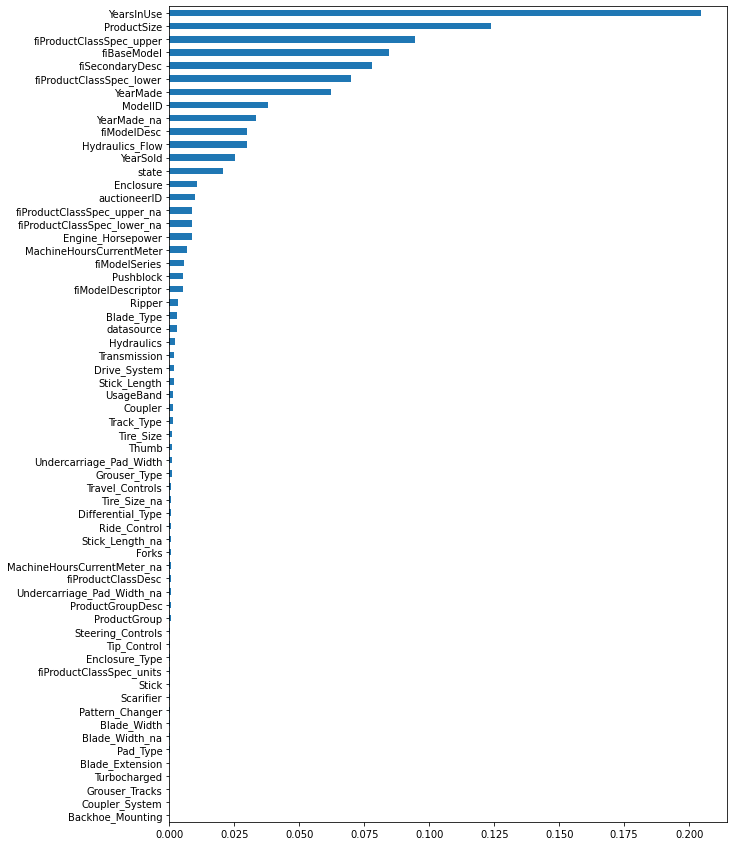

In [130]:
(rf, feature_names, feature_importance, oob_hydralics) = train_and_plot_model(df, drop_features=['saledate'])

There is only a slight increase in OOB score but if we check the feature importance plot both `fiProductClassSpec_upper` and  `fiProductClassSpec_lower` are showing high importance. We can take this as a positive signal for good features.

### Hydralics_Flow

We need to apply one hot encoding (OHE) to this feature. Let's start by checking unique values for `Hydraulics_Flow`.

In [131]:
df['Hydraulics_Flow'].value_counts()

0    357788
2     42784
1       553
Name: Hydraulics_Flow, dtype: int64

We have encoded this feature in the preprocessing section. Although we can use this encoded feature for one-hot encoding but we don't have original labels at this point. It would be better if we use original labels for OHE so that the dummy columns created as a result of that also have proper names with labels. Using encoded dummy column names makes them difficult to understand and follow. let's use the original dataframe to check the unique values.

In [132]:
df_raw['Hydraulics_Flow'].value_counts(dropna=False)

NaN                    357763
Standard                42784
High Flow                 553
None or Unspecified        25
Name: Hydraulics_Flow, dtype: int64

Before applying OHE we need to preprocess 'None or Unspecified' as they repsent the same as `np.nan`. So let's do that.  

In [133]:
## 
# get the original values
df['Hydraulics_Flow'] = df_raw['Hydraulics_Flow']
df['Hydraulics_Flow'] = df['Hydraulics_Flow'].replace('None or Unspecified', np.nan)

df['Hydraulics_Flow'].value_counts(dropna=False)

NaN          357788
Standard      42784
High Flow       553
Name: Hydraulics_Flow, dtype: int64

Let's check the first few rows of this column. We will use them to verify our final result.

In [134]:
df['Hydraulics_Flow'].head()

0         NaN
1         NaN
2    Standard
3         NaN
4    Standard
Name: Hydraulics_Flow, dtype: object

Notice that in the first five rows there are 'Standard' values at row index 2 and 4, and the remaining are 'NaN' values. We will OHE them in the next step and compare the results to ensure encoding is properly working.

In [135]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_output = onehot_encoder.fit_transform(df[['Hydraulics_Flow']])

# check the output
print(onehot_output[:5].toarray())

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


These are same five rows but this time encoded with one-hot values. From the position of '1' appearing in different columns we can deduce that first column is for label 'High Flow' and second is for 'Standard' and third is for 'NaN'. It would be easier for us to track these dummy columns if we have proper names on them. So let's do that.

We can get the dummy column names by calling `get_feature_names_out()` on our encoder.

In [136]:
# name of the columns
onehot_encoder.get_feature_names_out()

array(['Hydraulics_Flow_High Flow', 'Hydraulics_Flow_Standard',
       'Hydraulics_Flow_nan'], dtype=object)

To create a dataframe of these dummy variables.

In [137]:
df_onehot = pd.DataFrame(onehot_output.toarray(), columns=onehot_encoder.get_feature_names_out())
df_onehot.head()

,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


At this point `Hydraulics_Flow` is OHE so we can drop the original column from the dataset and add these encoded columns.

In [138]:
del df['Hydraulics_Flow']

df = pd.concat([df, df_onehot], axis=1) # concat dataframes column wise
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,fiProductClassSpec_lower,fiProductClassSpec_upper,fiProductClassSpec_units,fiProductClassSpec_lower_na,fiProductClassSpec_upper_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan
0,66000,3157,121,23,2004.0,68.0,2,2006-11-16,950,296,40,0,0,0,6,1,6,6,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,110.0,120.0,2,False,False,0.0,0.0,1.0
1,57000,77,121,23,1996.0,4640.0,2,2004-03-26,1725,527,54,97,0,4,6,33,6,6,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,150.0,175.0,2,False,False,0.0,0.0,1.0
2,10000,7009,121,23,2001.0,2838.0,1,2004-02-26,331,110,0,0,0,0,4,32,3,3,0,5,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,1351.0,1601.0,3,False,False,0.0,1.0,0.0
3,38500,332,121,23,2001.0,3486.0,1,2011-05-19,3674,1375,0,44,0,6,2,44,4,4,0,3,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,12.0,14.0,4,False,False,0.0,0.0,1.0
4,11000,17311,121,23,2007.0,722.0,3,2009-07-23,4208,1529,0,0,0,0,4,32,3,3,0,1,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,1601.0,1751.0,3,False,False,0.0,1.0,0.0


Let's retain our model to check if there is any affect on model performance.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.6min finished


OOB scrore =  0.905 
Tree leaves =  14,650,376 
Median depth = 48.0


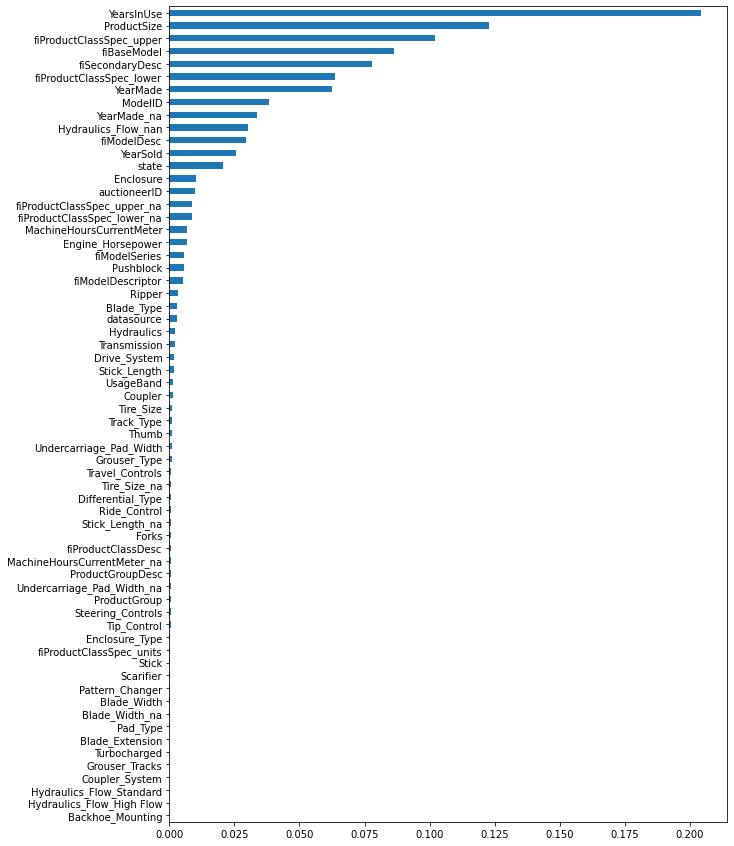

In [139]:
(rf, feature_names, feature_importance, oob_hydralics) = train_and_plot_model(df, drop_features=['saledate'])

There is no effect on the model performance but one feature 'Hydraulics_Flow_nan' is showing some importance on the plot. The remaining features ('Hydraulics_Flow_High Flow' and 'Hydraulics_Flow_Standard') do not affect the model's performance. If it was not of 'Hydraulics_Flow_nan' importance we could have skipped OHE for 'Hydraulics_Flow'.

### Enclosure

Next feature is `Enclosure`, and we will follow the same steps as for last feature to one-hot encode it.

In [ ]:
##
# check value counts
df_raw['Enclosure'].value_counts(dropna=False)

OROPS                  173932
EROPS                  139026
EROPS w AC              87820
NaN                       325
EROPS AC                   17
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

Here **ROPS** is an abbreviation for **Roll Over Protection System** and there are multiple variants of this standard
* OROPS = Open ROPS
* EROPS = Enclosed ROPS
* EROPS AC = Enclosed ROPS with Air Conditioning
* EROPS w AC = Enclosed ROPS with Air Conditioning. Same as 'EROPS AC'
* NO ROPS = No ROPS. Same as 'NaN' or 'None or Unspecified'

You can read more about ROPS standards here
* http://www.miningrops.com.au/ropsintro.html
* https://www.youtube.com/watch?v=LZ40O1My8E4&ab_channel=MissouriEarthMovers

Using this information we can also preprocess this feature to make its values more consistent.

In [140]:
## 
# get the original values
df['Enclosure'] = df_raw['Enclosure']

# change 'None or Unspecified' and 'NO ROPS' to np.nan
df['Enclosure'] = df['Enclosure'].replace('None or Unspecified', np.nan)
df['Enclosure'] = df['Enclosure'].replace('NO ROPS', np.nan)

# change 'EROPS w AC' to 'EROPS AC'
df['Enclosure'] = df['Enclosure'].replace('EROPS w AC', 'EROPS AC')

df['Enclosure'].value_counts(dropna=False)

OROPS       173932
EROPS       139026
EROPS AC     87837
NaN            330
Name: Enclosure, dtype: int64

In [141]:
##
# before OHE
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,fiProductClassSpec_lower,fiProductClassSpec_upper,fiProductClassSpec_units,fiProductClassSpec_lower_na,fiProductClassSpec_upper_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan
0,66000,3157,121,23,2004.0,68.0,2,2006-11-16,950,296,40,0,0,0,6,1,6,6,0,EROPS AC,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,110.0,120.0,2,False,False,0.0,0.0,1.0
1,57000,77,121,23,1996.0,4640.0,2,2004-03-26,1725,527,54,97,0,4,6,33,6,6,0,EROPS AC,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,150.0,175.0,2,False,False,0.0,0.0,1.0
2,10000,7009,121,23,2001.0,2838.0,1,2004-02-26,331,110,0,0,0,0,4,32,3,3,0,OROPS,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,1351.0,1601.0,3,False,False,0.0,1.0,0.0
3,38500,332,121,23,2001.0,3486.0,1,2011-05-19,3674,1375,0,44,0,6,2,44,4,4,0,EROPS AC,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,12.0,14.0,4,False,False,0.0,0.0,1.0
4,11000,17311,121,23,2007.0,722.0,3,2009-07-23,4208,1529,0,0,0,0,4,32,3,3,0,EROPS,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,1601.0,1751.0,3,False,False,0.0,1.0,0.0


In [142]:
##
# one hot encode 'Enclosure'
onehot_encoder = OneHotEncoder()
onehot_output = onehot_encoder.fit_transform(df[['Enclosure']])

df_onehot = pd.DataFrame(onehot_output.toarray(), columns=onehot_encoder.get_feature_names_out())
df_onehot.head()

,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_OROPS,Enclosure_nan
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [143]:
## 
# drop original column
del df['Enclosure']

# add dummy columns to the dataframe
df = pd.concat([df, df_onehot], axis=1) # concat dataframes column wise

# after OHE
df.head() 

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,fiProductClassSpec_lower,fiProductClassSpec_upper,fiProductClassSpec_units,fiProductClassSpec_lower_na,fiProductClassSpec_upper_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_OROPS,Enclosure_nan
0,66000,3157,121,23,2004.0,68.0,2,2006-11-16,950,296,40,0,0,0,6,1,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,110.0,120.0,2,False,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,57000,77,121,23,1996.0,4640.0,2,2004-03-26,1725,527,54,97,0,4,6,33,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,150.0,175.0,2,False,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,10000,7009,121,23,2001.0,2838.0,1,2004-02-26,331,110,0,0,0,0,4,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,1351.0,1601.0,3,False,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,38500,332,121,23,2001.0,3486.0,1,2011-05-19,3674,1375,0,44,0,6,2,44,4,4,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,12.0,14.0,4,False,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,11000,17311,121,23,2007.0,722.0,3,2009-07-23,4208,1529,0,0,0,0,4,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,1601.0,1751.0,3,False,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Let's retain our model to check if there is any affect on model performance.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  3.6min finished


OOB scrore =  0.902 
Tree leaves =  14,668,686 
Median depth = 45.0


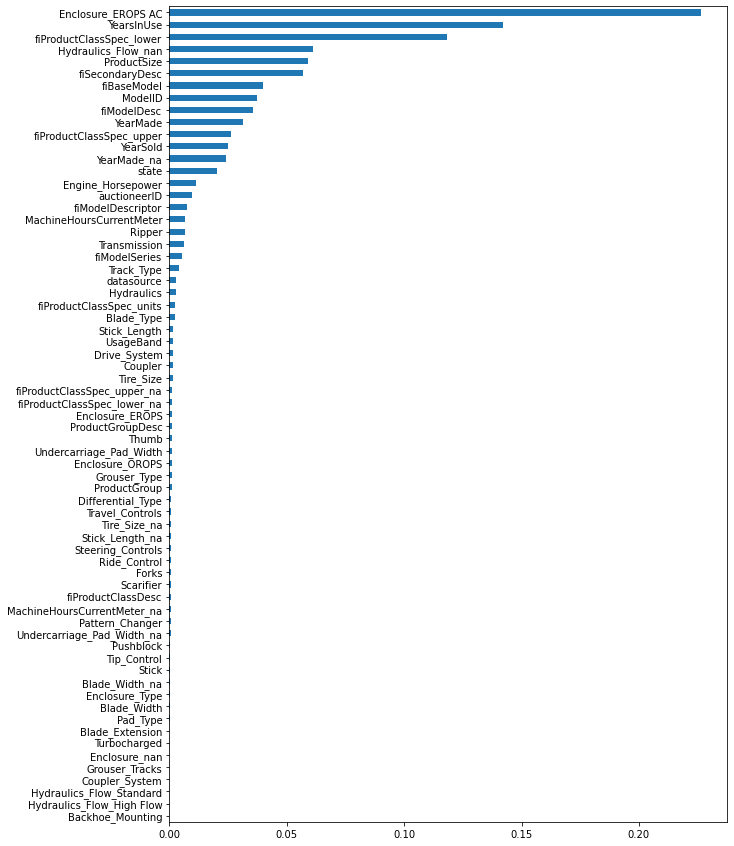

In [144]:
(rf, feature_names, feature_importance, oob_enclosure) = train_and_plot_model(df, drop_features=['saledate'])

There is a slight decrease in model performance but one new feature 'Enclosure_EROPS AC' is showing very high on the importance plot.

### saledate

We have already created 'yearsold' feature. We can more consequent features from 'saledate'.

In [145]:
df["salemonth"] = df['saledate'].dt.month
df["saleday"] = df['saledate'].dt.day
df["saledayofweek"] = df['saledate'].dt.dayofweek
df["saledayofyear"] = df['saledate'].dt.dayofyear

# we can drop the orignal
del df['saledate']

In [146]:
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,YearMade_na,YearSold,YearsInUse,MachineHoursCurrentMeter_na,Tire_Size_na,Stick_Length_na,Undercarriage_Pad_Width_na,Blade_Width_na,fiProductClassSpec_lower,fiProductClassSpec_upper,fiProductClassSpec_units,fiProductClassSpec_lower_na,fiProductClassSpec_upper_na,Hydraulics_Flow_High Flow,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_OROPS,Enclosure_nan,salemonth,saleday,saledayofweek,saledayofyear
0,66000,3157,121,23,2004.0,68.0,2,950,296,40,0,0,0,6,1,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2006,2.0,False,True,True,True,True,110.0,120.0,2,False,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11,16,3,320
1,57000,77,121,23,1996.0,4640.0,2,1725,527,54,97,0,4,6,33,6,6,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,23.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,4,2,False,2004,8.0,False,False,True,True,True,150.0,175.0,2,False,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,26,4,86
2,10000,7009,121,23,2001.0,2838.0,1,331,110,0,0,0,0,4,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2004,3.0,False,True,True,True,True,1351.0,1601.0,3,False,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,26,3,57
3,38500,332,121,23,2001.0,3486.0,1,3674,1375,0,44,0,6,2,44,4,4,0,0,0,0,0,0,0,0,14.0,0,0,1,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2011,10.0,False,True,True,True,True,12.0,14.0,4,False,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5,19,3,139
4,11000,17311,121,23,2007.0,722.0,3,4208,1529,0,0,0,0,4,32,3,3,0,0,0,0,0,0,0,0,14.0,0,0,4,0,0,0,0,20.5,0,0,0,0,28.0,9.7,0,0,0,0,0,0,0,0,False,2009,2.0,False,True,True,True,True,1601.0,1751.0,3,False,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7,23,3,204


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  3.9min finished


OOB scrore =  0.907 
Tree leaves =  14,493,456 
Median depth = 45.0


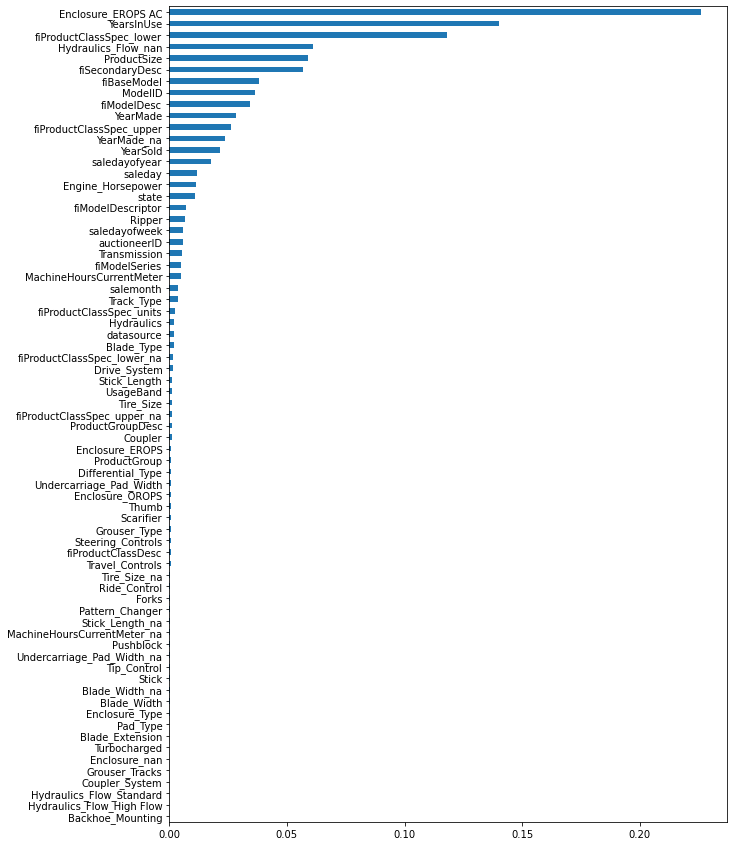

In [147]:
(rf, feature_names, feature_importance, oob_date) = train_and_plot_model(df)

There is an increase in model performance and multiple newly created date features are showing good importance on the plot. 